In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.446017,0.475916,-0.865160,-1.281294,-0.512712,1
1,-4.861243,-1.677149,0.824539,1.277391,1.293144,0
2,-1.956967,0.984776,0.801763,0.879378,-0.262689,0
3,0.375297,1.387846,-2.314684,-0.587485,0.467230,1
4,-1.600631,-0.151444,-2.288004,0.994509,-1.877313,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
import random
df1 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_20232\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_20232\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_20232\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col4', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')


In [11]:
df3.shape

(50, 3)

In [12]:
df3.head(5)

,col3,col5,target
15,-3.282887,-1.937838,0
94,-1.524428,-0.575791,1
35,-2.102650,4.520290,1
34,0.260085,1.174433,0
64,0.157950,0.044632,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [14]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [15]:
from sklearn.tree import plot_tree

[Text(0.5555555555555556, 0.875, 'x[1] <= -0.021\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= -2.339\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[0] <= -2.523\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.7777777777777778, 0.625, 'x[1] <= 0.793\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 0.766\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0

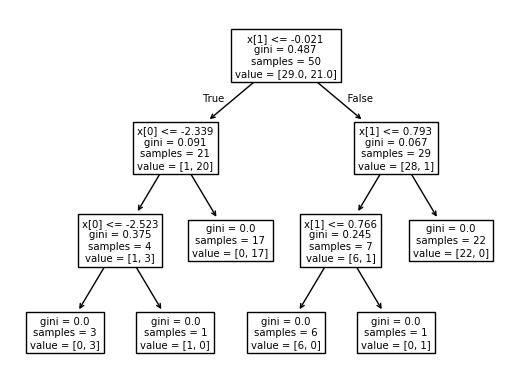

In [16]:
plot_tree(clf1)

[Text(0.25, 0.9166666666666666, 'x[0] <= -0.476\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.125, 0.75, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.1875, 0.8333333333333333, 'True  '),
 Text(0.375, 0.75, 'x[1] <= -1.796\ngini = 0.245\nsamples = 35\nvalue = [5, 30]'),
 Text(0.3125, 0.8333333333333333, '  False'),
 Text(0.25, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= 0.289\ngini = 0.165\nsamples = 33\nvalue = [3, 30]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= -0.11\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.4166666666666667, 'x[1] <= -0.937\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.625, 0.25, 'x[1] <= -1.185\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.08333333333

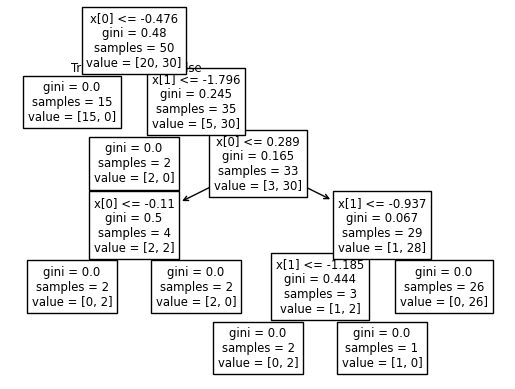

In [17]:
plot_tree(clf2)

[Text(0.625, 0.95, 'x[1] <= 1.416\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.5416666666666666, 0.85, 'x[0] <= 0.73\ngini = 0.454\nsamples = 46\nvalue = [30, 16]'),
 Text(0.5833333333333333, 0.8999999999999999, 'True  '),
 Text(0.4583333333333333, 0.75, 'x[1] <= 0.286\ngini = 0.48\nsamples = 40\nvalue = [24, 16]'),
 Text(0.2916666666666667, 0.65, 'x[0] <= -2.174\ngini = 0.451\nsamples = 35\nvalue = [23, 12]'),
 Text(0.20833333333333334, 0.55, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.55, 'x[1] <= -2.107\ngini = 0.497\nsamples = 26\nvalue = [14, 12]'),
 Text(0.2916666666666667, 0.45, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4583333333333333, 0.45, 'x[0] <= -1.449\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.25, 0.35, 'x[1] <= -0.846\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.16666666666666666, 0.25, 'x[1] <= -1.162\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.08333333333333333, 0.15, 'gini = 0.0\nsamples = 2\nvalue = 

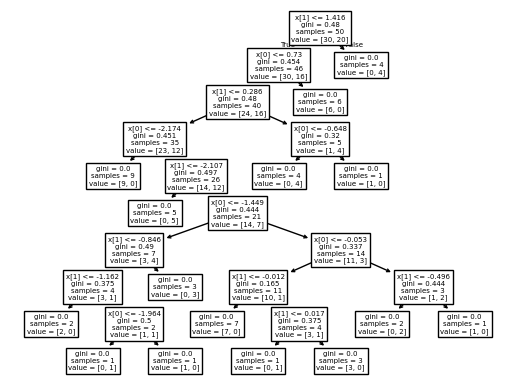

In [18]:
plot_tree(clf3)

In [19]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

d:\ineuron\ineuron_class\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

d:\ineuron\ineuron_class\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

d:\ineuron\ineuron_class\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
45,0.943424,-2.611266,-4.155111,0.678553,-3.116784,0
31,-0.812390,2.068742,-1.397660,-0.160790,1.503630,1
14,0.177462,-1.326308,-0.033662,1.773635,-0.276961,0
50,-0.152136,2.103375,-2.363297,-0.682095,-2.699943,1
87,-3.390709,-3.751103,2.617349,1.066791,2.210403,0
98,-0.734040,-0.865901,-3.252727,0.706465,-2.776862,0
1,-4.861243,-1.677149,0.824539,1.277391,1.293144,0
5,-1.191949,-2.332303,-1.002370,2.016991,-0.524612,0
57,-2.323407,-0.990319,-0.915255,1.249449,-0.236803,0
83,-1.805812,-0.646738,-0.078948,1.130111,-0.024221,0
